# INF8225 TP1 H25 (v2.0)

Gervais Presley - KOYAWEDA / Matricule 2305686

Partie 3 réalisée: [seul(e)]
ou avec
[Prénom - NOM -
Matricule ########]

Date limite :

20h30 le 6 février 2025 (Partie 1 et 2)

20h30 le 20 février 2025 (Partie 3)

Remettez votre fichier Colab sur Moodle en 2 formats: **.pdf** ET **.ipynb**

**Comment utiliser**:

Il faut copier ce notebook dans vos dossiers pour avoir une version que vous pouvez modifier, voici deux façons de le faire:
* File / Save a copy in Drive ...
* File / Download .ipynb

**Pour utiliser un GPU**

Runtime / Change Runtime Type / Hardware Accelerator / GPU

# Partie 1 (16 points)



## Objectif
L’objectif de la Partie 1 du travail pratique est de permettre à l’étudiant de se familiariser avec les réseaux Bayésiens et la librairie Numpy.

## Problème


Considérons le réseau Bayésien ci-dessous.

<img src="https://drive.google.com/uc?id=1QCJSfYGLJVg2-0_BO8BEHCnMEDsHSR6k" alt="bayes_net" width="600"/>

Ceci représente un modèle simple pour les notes à un examen (G) et sa relation avec les étudiants qui se préparent aux examens et font correctement le travail pour les devoirs (S), les étudiants qui ont des difficultés dans la vie juste avant l'examen final (D), les étudiants qui réussissent bien à un entretien technique pour un emploi axé sur le sujet du cours (R), et des étudiants qui se retrouvent sur une sorte de palmarès de leur programme (L).

## Trucs et astuces
Nous utiliserons des vecteurs multidimensionnels `5d-arrays` dont les `axes` représentent:
```
axe 0 : Se préparer (S)
axe 1 : Difficultés avant l'exam (D)
axe 2 : Réussir l'entretien technique (R)
axe 3 : Note dans le cours (Grade) (G)
axe 4 : Liste d'honneur (L)
```

Chaque `axe` serait de dimension `2` ou `3`:
```
Exemple pour S:
0 : s0
1 : s1

Exemple pour G:
0 : g0
1 : g1
2 : g2
```
Quelques point à garder en tête:
- Utiliser la jointe comme point de départ pour vos calculs (ne pas développer tous les termes à la main).
- Attention à l'effet du do-operator sur le graphe.
- L'argument "keepdims=True" de "np.sum()" vous permet conserver les mêmes indices.
- Pour un rappel sur les probabilités conditionelles, voir: https://www.probabilitycourse.com/chapter1/1_4_0_conditional_probability.php

## 1. Complétez les tables de probabilités ci-dessous

In [ ]:
import numpy as np
np.set_printoptions(precision=5)

# Les tableaux sont bâtis avec les dimensions (S, D, R, G, L)
# et chaque dimension avec les probablités associées aux 2 ou 3 valeurs possibles ({0, 1} ou {0, 1, 2})

Pr_S = np.array([0.2, 0.8]).reshape(2, 1, 1, 1, 1) # Donné en exemple
Pr_D = np.array([0.9, 0.1]).reshape(1, 2, 1, 1, 1) # TODO
Pr_R_given_S = np.array([[0.9, 0.1],[0.2, 0.8]]).reshape(2, 1, 2, 1, 1) # TODO
Pr_G_given_SD = np.array([
    [0.5, 0.3, 0.2],
    [0.9, 0.08, 0.02],
    [0.1, 0.2, 0.7],
    [0.3, 0.4, 0.3]
]).reshape(2, 2, 1, 3, 1)  # TODO
Pr_L_given_G = np.array([
            [0.9, 0.1],
            [0.6, 0.4],
            [0.01, 0.99]
]).reshape(1, 1, 1, 3, 2) # TODO

print (f"Pr(S)=\n{np.squeeze(Pr_S)}\n")
print (f"Pr(D)=\n{np.squeeze(Pr_D)}\n")
print (f"Pr(R|S)=\n{np.squeeze(Pr_R_given_S)}\n")
print (f"Pr(G|S,D)=\n{np.squeeze(Pr_G_given_SD)}\n")
print (f"Pr(L|G)=\n{np.squeeze(Pr_L_given_G)}\n")

Pr(S)=
[0.2 0.8]

Pr(D)=
[0.9 0.1]

Pr(R|S)=
[[0.9 0.1]
 [0.2 0.8]]

Pr(G|S,D)=
[[[0.5  0.3  0.2 ]
  [0.9  0.08 0.02]]

 [[0.1  0.2  0.7 ]
  [0.3  0.4  0.3 ]]]

Pr(L|G)=
[[0.9  0.1 ]
 [0.6  0.4 ]
 [0.01 0.99]]



## 2. À l'aide de ces tables de probabilité conditionnelles, calculez les requêtes ci-dessous. Dans les cas où l'on compare un calcul non interventionnel à un calcul interventionnel, commentez sur l'interprétation physique des deux situations et les résultats obtenus à partir de vos modèles.

a) $Pr(G) = [P (G = g^0), P (G = g^1), P (G = g^2)]$

In [ ]:
answer_a = np.zeros(3)
for s in range(2):
  for d in range(2):
    answer_a += Pr_S[s, 0, 0, 0] * Pr_D[0, d, 0, 0] * Pr_G_given_SD[s, d, 0, :, 0] #TODO
print(f"Pr(G)={answer_a}")

Pr(G)=[0.204  0.2316 0.5644]


b) $Pr(G|R = r^1)$

In [ ]:
answer_b = np.zeros(3)  # Pour P(G | R = r^1)
norm_factor_b = 0  # Facteur de normalisation

for s in range(2):  # Somme sur S
    for d in range(2):  # Somme sur D
        # Numérateur
        prob = (
            Pr_S[s, 0, 0, 0, 0] *       # P(S = s)
            Pr_D[0, d, 0, 0, 0] *       # P(D = d)
            Pr_R_given_S[s, 0, 1, 0, 0] *  # P(R = r^1 | S = s)
            Pr_G_given_SD[s, d, 0, :, 0]   # P(G | S, D)
        )
        answer_b += prob

        # Dénominateur
        norm_factor_b += (
            Pr_S[s, 0, 0, 0, 0] *       # P(S = s)
            Pr_D[0, d, 0, 0, 0] *       # P(D = d)
            Pr_R_given_S[s, 0, 1, 0, 0]    # P(R = r^1 | S = s)
        )

# Normalisation
answer_b /= norm_factor_b

print(f"Pr(G|R=r1)={answer_b}")


Pr(G|R=r1)=[0.13273 0.22176 0.64552]


c)  $Pr(G|R = r^0)$

In [ ]:
answer_c = np.zeros(3)  # Pour P(G | R = r^0)
norm_factor_c = 0  # Facteur de normalisation

for s in range(2):  # Somme sur S
    for d in range(2):  # Somme sur D
        # Numérateur
        prob = (
            Pr_S[s, 0, 0, 0, 0] *       # P(S = s)
            Pr_D[0, d, 0, 0, 0] *       # P(D = d)
            Pr_R_given_S[s, 0, 0, 0, 0] *  # P(R = r^0 | S = s)
            Pr_G_given_SD[s, d, 0, :, 0]   # P(G | S, D)
        )
        answer_c += prob

        # Dénominateur
        norm_factor_c += (
            Pr_S[s, 0, 0, 0, 0] *       # P(S = s)
            Pr_D[0, d, 0, 0, 0] *       # P(D = d)
            Pr_R_given_S[s, 0, 0, 0, 0]    # P(R = r^0 | S = s)
        )

# Normalisation
answer_c /= norm_factor_c

print(f"Pr(G|R=r0)={answer_c}")

Pr(G|R=r0)=[0.34235 0.25071 0.40694]


d) $Pr(G|R=r^1, S=s^0)$

In [ ]:
answer_d = np.zeros(3)  # Pour Pr(G|R=r1, S=s0)
s = 0  # S = s0
r = 1  # R = r1

# Calcul du numérateur
for d in range(2):  # D peut être d0 ou d1
    prob = (
        Pr_G_given_SD[s, d, 0, :, 0] *  # P(G | S=s0, D=d)
        Pr_D[0, d, 0, 0, 0]  # P(D=d)
    )
    answer_d += prob

# Multiplication par P(R=r1 | S=s0)
answer_d *= Pr_R_given_S[s, 0, r, 0, 0]

# Normalisation pour obtenir une probabilité valide
answer_d /= np.sum(answer_d)  # Garantit que la somme des probabilités est égale à 1

# Affichage du résultat
print(f"Pr(G|R=r1, S=s0)={answer_d}")

Pr(G|R=r1, S=s0)=[0.54  0.278 0.182]


e) $Pr(G|R=r^0, S=s^0)$

In [ ]:
answer_e = np.zeros(3)  # Pour P(G | R = r0, S = s0)
s = 0  # S = s0
r = 0  # R = r0

# Calcul du numérateur
for d in range(2):  # D peut être d0 ou d1
    prob = (
        Pr_G_given_SD[s, d, 0, :, 0] *  # P(G | S = s0, D = d)
        Pr_D[0, d, 0, 0, 0]  # P(D = d)
    )
    answer_e += prob

# Multiplication par P(S = s0) * P(R = r0 | S = s0)
numerator = answer_e * Pr_S[s, 0, 0, 0, 0] * Pr_R_given_S[s, 0, r, 0, 0]

# Dénominateur
denominator = Pr_S[s, 0, 0, 0, 0] * Pr_R_given_S[s, 0, r, 0, 0]

# Calcul final (division)
answer_e = numerator / denominator

# Affichage
print(f"Pr(G|R=r0, S=s0)={answer_e}")

Pr(G|R=r0, S=s0)=[0.54  0.278 0.182]


f) $Pr(R|D=d^1)$

In [ ]:
answer_f = np.zeros(2) # TODO

# Numérateur : Pr(R, D=d1)
for s in range(2):  # Somme sur S
    prob_r_d = (
        Pr_R_given_S[s, 0, :] *  # P(R|S=s)
        Pr_S[s, 0, 0, 0, 0] *    # P(S=s)
        Pr_D[0, 1, 0, 0, 0]      # P(D=d1)
    )
    # Redimensionner prob_r_d pour s'assurer que ses dimensions sont compatibles avec answer_f
    answer_f += np.squeeze(prob_r_d)

# Dénominateur : Pr(D=d1)
Pr_D_d1 = np.sum(answer_f)  # La somme sur R donne P(D=d1)

# Normalisation pour obtenir Pr(R|D=d1)
answer_f /= Pr_D_d1

print(f"Pr(R|D=d1)={answer_f}")

Pr(R|D=d1)=[0.34 0.66]


g) $Pr(R|D=d^0)$

In [ ]:
answer_g = np.zeros(2) # TODO

# Numérateur : Pr(R, D=d0)
for s in range(2):  # Somme sur S
    prob_r_d = (
        Pr_R_given_S[s, 0, :] *  # P(R|S=s)
        Pr_S[s, 0, 0, 0, 0] *    # P(S=s)
        Pr_D[0, 0, 0, 0, 0]      # P(D=d0)
    )

    answer_g += np.squeeze(prob_r_d)

# Dénominateur : Pr(D=d0)
Pr_D_d0 = np.sum(answer_g)  # La somme sur R donne P(D=d0)

# Normalisation pour obtenir Pr(R|D=d0)
answer_g /= Pr_D_d0

print(f"Pr(R|D=d0)={answer_g}")

Pr(R|D=d0)=[0.34 0.66]


h) $Pr(R|D=d^1, G=g^2)$

In [ ]:
answer_h = np.zeros(2) # TODO

# Numérateur : Pr(R, D=d1, G=g2)
for s in range(2):  # Somme sur S
    prob_r_d_g = (
        Pr_R_given_S[s, 0, :] *  # P(R|S=s)
        Pr_S[s, 0, 0, 0, 0] *    # P(S=s)
        Pr_D[0, 1, 0, 0, 0] *    # P(D=d1)
        Pr_G_given_SD[s, 1, 0, 2, 0]  # P(G=g2|S=s, D=d1)
    )

    answer_h += np.squeeze(prob_r_d_g)

# Dénominateur : Pr(D=d1, G=g2)
Pr_D_G = np.sum(answer_h)  # La somme sur R donne P(D=d1, G=g2)

# Normalisation
answer_h /= Pr_D_G

print(f"Pr(R|D=d1, G=g2)={answer_h}")

Pr(R|D=d1, G=g2)=[0.21148 0.78852]


i) $Pr(R|D=d^0, G=g^2)$

In [ ]:
# Initialisation du vecteur pour Pr(R|D=d0, G=g2) avec R = {r0, r1}
answer_i = np.zeros(2)

# Numérateur : Pr(R, D=d0, G=g2)
for s in range(2):  # Somme sur S
    # Calcul de Pr(R, D=d0, G=g2) pour chaque valeur de S
    prob_r_d_g = (
        np.squeeze(Pr_R_given_S[s, 0, :]) *  # P(R|S=s), vecteur de taille (2,)
        Pr_S[s, 0, 0, 0, 0] *                # P(S=s), scalaire
        Pr_D[0, 0, 0, 0, 0] *                # P(D=d0), scalaire
        Pr_G_given_SD[s, 0, 0, 2, 0]         # P(G=g2|S=s, D=d0), scalaire
    )

    # Ajout de la contribution au numérateur
    answer_i += prob_r_d_g.reshape(-1)  # Aplatir en un vecteur unidimensionnel si nécessaire

# Dénominateur : Pr(D=d0, G=g2)
proba_d_g = np.sum(answer_i)  # La somme sur R donne Pr(D=d0, G=g2)

# Normalisation pour obtenir Pr(R|D=d0, G=g2)
answer_i /= proba_d_g

print(f"Pr(R|D=d0, G=g2)={answer_i}")

Pr(R|D=d0, G=g2)=[0.24667 0.75333]


j) $Pr(R|D=d^1, L=l^1)$

In [ ]:
answer_j = np.zeros(2) # TODO

#Numérateur : Pr(R, D=d1, L=l1)
numerator_j=np.zeros(2)
for s in range(2):
  for g in range(3):
    proba_r_d_l=(
        Pr_R_given_S[s,0,:]*
        Pr_S[s,0,0,0,0]*
        Pr_D[0,1,0,0,0]*
        Pr_G_given_SD[s, 1, 0, g, 0]* # P(G=g|S=s, D=d1)
        Pr_L_given_G[0,0,0,g,1] # P(L=l1|G=g)
    )
    numerator_j +=np.squeeze(proba_r_d_l)

# dénominateur : Pr(D=d1, L=l1)
denominator_j=np.sum(numerator_j) #Somme sur R

#Normalisation
answer_j=numerator_j/denominator_j


print(f"Pr(R|D=d1, L=l1)={answer_j}")

Pr(R|D=d1, L=l1)=[0.2475 0.7525]


k) $Pr(R|D=d^0, L=l^1)$

In [ ]:
answer_k = np.zeros(2)  # Pour Pr(R|D=d0, L=l1)

# Numérateur : Pr(R, D=d0, L=l1)
numerator_k = np.zeros(2)
for s in range(2):  # Somme sur S
    for g in range(3):  # Somme sur G
        proba_r_d_l = (
            Pr_R_given_S[s, 0, :] *         # P(R|S=s)
            Pr_S[s, 0, 0, 0, 0] *           # P(S=s)
            Pr_D[0, 0, 0, 0, 0] *           # P(D=d0)
            Pr_G_given_SD[s, 0, 0, g, 0] *  # P(G=g|S=s, D=d0)
            Pr_L_given_G[0, 0, 0, g, 1]     # P(L=l1|G=g)
        )
        numerator_k += np.squeeze(proba_r_d_l)

# Dénominateur : Pr(D=d0, L=l1)
denominator_k = np.sum(numerator_k)  # La somme sur R donne Pr(D=d0, L=l1)

# Normalisation pour obtenir Pr(R|D=d0, L=l1)
answer_k = numerator_k / denominator_k

# Affichage des résultats
print(f"Pr(R|D=d0, L=l1)={answer_k}")

Pr(R|D=d0, L=l1)=[0.2736 0.7264]


l) $Pr(R|do(G=g^2))$

In [ ]:
answer_l = np.zeros(2)

for s in range(2):  # Parcours des états de S
    for d in range(2):  # Parcours des états de D
        prob_r_do_g = (
            Pr_R_given_S[s, 0, :] *  # P(R|S=s)
            Pr_S[s, 0, 0, 0, 0])     # P(S=s)

        answer_l += np.squeeze(prob_r_do_g)

# Normalisation pour garantir que la somme des probabilités est 1
answer_l /= np.sum(answer_l)

print(f"Pr(R|do(G=g2))={answer_l}")


Pr(R|do(G=g2))=[0.34 0.66]


m) $Pr(R|G=g^2)$

In [ ]:
numerator_m = np.zeros(2)
denominator_m = 0          # Pr(G=g2)

# Calcul du numérateur et du dénominateur
for s in range(2):
    for d in range(2):
        prob_r_g = (
            Pr_R_given_S[s, 0, :] *  # P(R|S=s)
            Pr_S[s, 0, 0, 0, 0] *    # P(S=s)
            Pr_D[0, d, 0, 0, 0] *    # P(D=d)
            Pr_G_given_SD[s, d, 0, 2, 0]  # P(G=g2|S=s, D=d)
        )
        # Ajout au numérateur
        numerator_m += np.squeeze(prob_r_g)

        # Ajout au dénominateur (somme sur R pour Pr(G=g2))
        denominator_m += np.sum(prob_r_g)

# Normalisation : Pr(R|G=g2)
answer_m = numerator_m / denominator_m

print(f"Pr(R|G=g2)={answer_m}")

Pr(R|G=g2)=[0.24515 0.75485]


In [ ]:
Pr_G = np.sum(Pr_G_given_SD * Pr_S * Pr_D, axis=(0,1), keepdims=True)
answer_l = answer_b
print(f"Pr(R|do(G=g2))={np.squeeze(answer_l)}")

Pr(R|do(G=g2))=[0.13273 0.22176 0.64552]


n) $Pr(R)$

In [ ]:
answer_n = np.zeros(2)  # Pour R = {r0, r1}

for s in range(2):  # S = {s0, s1}
    prob_r = (
        Pr_R_given_S[s, 0, :] *  # P(R|S=s)
        Pr_S[s, 0, 0, 0, 0]      # P(S=s)
    )
    # Ajout de la contribution pour chaque S
    answer_n += np.squeeze(prob_r)

print(f"Pr(R)={answer_n}")

Pr(R)=[0.34 0.66]


o) $Pr(G|do(L=l^1))$

In [ ]:
answer_o = np.zeros(3)  # Pour G = {g0, g1, g2}

# Numérateur : Calcul de Pr(G)
for s in range(2):  # S = {s0, s1}
    for d in range(2):  # D = {d0, d1}
        prob_g = (
            Pr_S[s, 0, 0, 0, 0] *       # P(S=s)
            Pr_D[0, d, 0, 0, 0] *       # P(D=d)
            Pr_G_given_SD[s, d, 0, :, 0]  # P(G|S=s, D=d)
        )
        # Ajout de la contribution pour chaque combinaison de S et D
        answer_o += np.squeeze(prob_g)

# Normalisation
answer_o /= np.sum(answer_o)

print(f"Pr(G|do(L=l1))={answer_o}")

Pr(G|do(L=l1))=[0.204  0.2316 0.5644]


p) $Pr(G=1|L=l^1)$

In [ ]:
answer_p = 0  # Pour Pr(G = g1 | L = l1)
numerator_p = 0  # Numérateur : Pr(G = g1, L = l1)
denominator_p = 0  # Dénominateur : Pr(L = l1)

for s in range(2):  # S = {s0, s1}
    for d in range(2):  # D = {d0, d1}
        # Numérateur : Pr(G = g1, L = l1)
        prob_g_l = (
            Pr_S[s, 0, 0, 0, 0] *           # P(S = s)
            Pr_D[0, d, 0, 0, 0] *           # P(D = d)
            Pr_G_given_SD[s, d, 0, 1, 0] *  # P(G = g1 | S = s, D = d)
            Pr_L_given_G[0, 0, 0, 1, 1]     # P(L = l1 | G = g1)
        )
        numerator_p += prob_g_l

        # Dénominateur : Pr(L = l1)
        for g in range(3):  # G = {g0, g1, g2}
            prob_l = (
                Pr_S[s, 0, 0, 0, 0] *           # P(S = s)
                Pr_D[0, d, 0, 0, 0] *           # P(D = d)
                Pr_G_given_SD[s, d, 0, g, 0] *  # P(G = g | S = s, D = d)
                Pr_L_given_G[0, 0, 0, g, 1]     # P(L = l1 | G = g)
            )
            denominator_p += prob_l

# Calcul final : Pr(G = g1 | L = l1)
answer_p = numerator_p / denominator_p

print(f"Pr(G=1|L=l1)={answer_p}")

Pr(G=1|L=l1)=0.13789900505510608


In [ ]:
print(f"a) Pr(G)={answer_a}")
print(f"b) Pr(G|R=r1)={answer_b}")
print(f"c) Pr(G|R=r0)={answer_c}")
print(f"d) Pr(G|R=r1, S=s0)={answer_d}")
print(f"e) Pr(G|R=r0, S=s0)={answer_e}")
print(f"f) Pr(R|D=d1)={answer_f}")
print(f"g) Pr(R|D=d0)={answer_g}")
print(f"h) Pr(R|D=d1, G=g2)={answer_h}")
print(f"i) Pr(R|D=d0, G=g2)={answer_i}")
print(f"j) Pr(R|D=d1, L=l1)={answer_j}")
print(f"k) Pr(R|D=d0, L=l1)={answer_k}")
print(f"l) Pr(R|do(G=g2))={answer_l}")
print(f"m) Pr(R|G=g2)={answer_m}")
print(f"n) Pr(R)={answer_n}")
print(f"o) Pr(G|do(L=l1))={answer_o}")
print(f"p) Pr(G=1|L=l1)={answer_p}")

a) Pr(G)=[0.204  0.2316 0.5644]
b) Pr(G|R=r1)=[0.13273 0.22176 0.64552]
c) Pr(G|R=r0)=[0.34235 0.25071 0.40694]
d) Pr(G|R=r1, S=s0)=[0.54  0.278 0.182]
e) Pr(G|R=r0, S=s0)=[0.54  0.278 0.182]
f) Pr(R|D=d1)=[0.34 0.66]
g) Pr(R|D=d0)=[0.34 0.66]
h) Pr(R|D=d1, G=g2)=[0.21148 0.78852]
i) Pr(R|D=d0, G=g2)=[0.24667 0.75333]
j) Pr(R|D=d1, L=l1)=[0.2475 0.7525]
k) Pr(R|D=d0, L=l1)=[0.2736 0.7264]
l) Pr(R|do(G=g2))=[0.13273 0.22176 0.64552]
m) Pr(R|G=g2)=[0.24515 0.75485]
n) Pr(R)=[0.34 0.66]
o) Pr(G|do(L=l1))=[0.204  0.2316 0.5644]
p) Pr(G=1|L=l1)=0.13789900505510608


**Réponse:**

Les résultats montrent une différence clé entre observation et causalité. Le calcul non interventionnel reflète une corrélation où les influences amont restent intactes, tandis que l’intervention coupe ces dépendances pour révéler l’impact direct d’une variable sur une autre.

Par exemple, fixer la note d’un étudiant sans tenir compte de sa préparation (S) et de ses difficultés (D) modifie ses chances de réussite à l’entretien (R), indiquant que ces facteurs influencent réellement R. Ainsi, une corrélation forte entre deux variables ne signifie pas forcément une relation causale.

L’approche interventionnelle permet donc d’identifier les véritables leviers d’action, essentiels pour la prise de décision en milieu incertain.

# Partie 2 (20 points)

## Objectif

L’objectif de la partie 2 du travail pratique est de permettre à l’étudiant de se familiariser avec l’apprentissage automatique via la régression logistique. Nous allons donc résoudre un problème de classification d'images en utilisant l’approche de descente du gradient (gradient descent) pour optimiser la log-vraisemblance négative (negative log-likelihood) comme fonction de perte.

L'algorithme à implémenter est une variation de descente de gradient qui s’appelle l’algorithme de descente de gradient stochastique par mini-ensemble (mini-batch stochastic gradient descent).  Votre objectif est d’écrire un programme en Python pour optimiser les paramètres d’un modèle étant donné un ensemble de données d’apprentissage, en utilisant un ensemble de validation pour déterminer quand arrêter l'optimisation, et finalement de montrer la performance sur l’ensemble du test.

## Théorie: la régression logistique et le calcul du gradient


Il est possible d’encoder l’information concernant l’étiquetage avec des vecteurs multinomiaux (one-hot vectors), c.-à-d. un vecteur de zéros avec un seul 1 pour indiquer quand la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. Les caractéristiques (features) sont données par des vecteurs $\mathbf{x}_i \in \mathbb{R}^{D}$. En définissant les paramètres de notre modèle comme : $\mathbf{W}=[\mathbf{w}_1, \cdots, \mathbf{w}_K]^T$ et $\mathbf{b}=[b_1, b_2, \cdots  b_K]^T$ et la fonction softmax comme fonction de sortie, on peut exprimer notre modèle sous la forme :
\begin{eqnarray}
    p(\mathbf{y}|\mathbf{x})
    &=& \frac{\exp(\mathbf{y}^T \mathbf{W} \mathbf{x} + \mathbf{y}^T \mathbf{b})}{\sum_{\mathbf{y}_k \in \mathscr{Y}} \exp(\mathbf{y}_k^T \mathbf{W} \mathbf{x} + \mathbf{y}_k^T \mathbf{b})}
\end{eqnarray}
L'ensemble de données consiste de $n$ paires (label, input) de la forme $\mathscr{D}:=(\mathbf{\tilde{y}}_i, \mathbf{\tilde{x}}_i)_{i=1}^n$, où nous utilisons l'astuce de redéfinir $\mathbf{\tilde{x}}_i = [\mathbf{\tilde{x}}_i^T 1]^T$ et nous redéfinissions la matrice de paramètres $\boldsymbol{\theta} \in \mathbb{R}^{K\times(D+1)}$ (voir des notes de cours pour la relation entre $\boldsymbol{\theta}$ et $\mathbf{W}$). Notre fonction de perte, la log-vraisemblance négative des données selon notre modèle est définie comme:
\begin{equation}
    \mathscr{L}\big( \boldsymbol{\theta}, \mathscr{D} \big) := -\log \prod_{i=1}^N P(\mathbf{\tilde{y}}_i|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})
\end{equation}
Pour cette partie du TP, nous avons calculé pour vous le gradient de la fonction de perte par rapport par rapport aux paramètres du modèle:
\begin{eqnarray}
    \frac{\partial}{\partial \boldsymbol{\theta}} \mathscr{L}\big( \boldsymbol{\theta}, \mathscr{D} \big)
    &=& -\sum_{i=1}^N \frac{\partial}{\partial \boldsymbol{\theta}} \Bigg\{\log \Bigg(\frac{\exp(\mathbf{\tilde{y}}_i^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)}{\sum_{\mathbf{y}_k \in \mathscr{Y}} \exp(\mathbf{y}_k^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)} \Bigg) \Bigg\} \\
    &=& -\sum_{i=1}^N \left(\mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i- \sum_{\mathbf{y}_k \in \mathscr{Y}} P(\mathbf{y}_k|\mathbf{\tilde{x}}_i,\boldsymbol{\theta}) \mathbf{y}_k \mathbf{\tilde{x}}^T_i \right) \\
    &=& \sum_{i=1}^N \mathbf{\hat{p}}_i \mathbf{\tilde{x}}^T_i - \sum_{i=1}^N \mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i
\end{eqnarray}
où $\mathbf{\hat{p}}_i$ est un vecteur de probabilités produit par le modèle pour l'exemple $\mathbf{\tilde{x}}_i$ et $\mathbf{\tilde{y}}_i$ est le vrai *label* pour ce même exemple.

Finalement, il reste à discuter de l'évaluation du modèle. Pour la tâche d'intérêt, qui est une instance du problème de classification, il existe plusieurs métriques pour mesurer les performances du modèle la précision de classification, l'erreur de classification, le taux de faux/vrai positifs/négatifs, etc. Habituellement dans le contexte de l'apprentissage automatique, la précision est la plus commune.

La précision est définie comme le rapport du nombre d'échantillons bien classés sur le nombre total d'échantillons à classer:
$$
\tau_{acc} := \frac{|\mathscr{C}|}{|\mathscr{D}|}
$$
où l'ensemble des échantillons bien classés $\mathscr{C}$ est:
$$
\mathscr{C} := \lbrace (\mathbf{x}, \mathbf{y}) \in \mathscr{D} \, | \, \underset{k}{\arg\max} \, \, P(\cdot|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})_k = \underset{k}{\arg\max} \, \, \tilde{y}_{i,k} \rbrace
$$
En mots, il s'agit du sous-ensemble d'échantillons pour lesquels la classe la plus probable selon notre modèle correspond à la vraie classe.

## Description des tâches

#### 1. Code à compléter

On vous demande de compléter l'extrait de code ci-dessous pour résoudre ce problème. Vous devez utiliser la librairie PyTorch cette partie du TP: https://pytorch.org/docs/stable/index.html. Mettez à jour les paramètres de votre modèle avec la descente par *mini-batch*. Exécutez des expériences avec trois différents ensembles: un ensemble d’apprentissages avec 90\% des exemples (choisis au hasard), un ensemble de validation avec 10\%. Utilisez uniquement l'ensemble de test pour obtenir votre meilleur résultat une fois que vous pensez avoir obtenu votre meilleure stratégie pour entraîner le modèle.

#### 2. Rapport à rédiger

Présentez vos résultats dans un rapport. Ce rapport devrait inclure:

- **Recherche d'hyperparamètres:** Faites une recherche d'hyperparamètres pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000 pour des modèles entrainés avec SGD. Présentez dans un tableau la précision finale du modèle, sur l'*ensemble de validation*, pour ces différentes combinaisons d'hyperparamètres.

- **Analyse du meilleur modèle:** Pour votre meilleur modèle, présentez deux figures montrant la progression de son apprentissage sur l'*ensembe d'entrainement et l'ensemble de validation*. La première figure montrant les courbes de log-vraisemblance négative moyenne après chaque epoch, la deuxième montrant la précision du modèle après chaque epoch. Finalement donnez la précision finale sur l'ensemble de test.

- **Lire l'article de recherche -
Adam**: a method for stochastic optimization. Kingma, D., \& Ba, J. (2015). International Conference on Learning Representation (ICLR).
https://arxiv.org/pdf/1412.6980.pdf. Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Fonctions fournies

In [ ]:
# fonctions pour charger les ensembles de donnees
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=1):
  dataset = FashionMNIST("./dataset", train=True,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  dataset_test = FashionMNIST("./dataset", train=False,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  len_train = int(len(dataset) * (1.-val_percentage))
  len_val = len(dataset) - len_train
  dataset_train, dataset_val = random_split(dataset, [len_train, len_val])
  data_loader_train = DataLoader(dataset_train, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_val   = DataLoader(dataset_val, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_test  = DataLoader(dataset_test, batch_size=batch_size,shuffle=True,num_workers=4)
  return data_loader_train, data_loader_val, data_loader_test

def reshape_input(x, y):
    x = x.view(-1, 784)
    y = torch.FloatTensor(len(y), 10).zero_().scatter_(1,y.view(-1,1),1)
    return x, y


# call this once first to download the datasets
_ = get_fashion_mnist_dataloaders()

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.9MB/s]


Extracting ./dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 307kB/s]


Extracting ./dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.62MB/s]


Extracting ./dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 15.2MB/s]

Extracting ./dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw




/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
# simple logger to track progress during training
class Logger:
    def __init__(self):
        self.losses_train = []
        self.losses_valid = []
        self.accuracies_train = []
        self.accuracies_valid = []

    def log(self, accuracy_train=0, loss_train=0, accuracy_valid=0, loss_valid=0):
        self.losses_train.append(loss_train)
        self.accuracies_train.append(accuracy_train)
        self.losses_valid.append(loss_valid)
        self.accuracies_valid.append(accuracy_valid)

    def plot_loss_and_accuracy(self, train=True, valid=True):

        assert train and valid, "Cannot plot accuracy because neither train nor valid."

        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                            figsize=(12, 6))

        if train:
            ax1.plot(self.losses_train, label="Training")
            ax2.plot(self.accuracies_train, label="Training")
        if valid:
            ax1.plot(self.losses_valid, label="Validation")
            ax1.set_title("CrossEntropy Loss")
            ax2.plot(self.accuracies_valid, label="Validation")
            ax2.set_title("Accuracy")

        for ax in figure.axes:
            ax.set_xlabel("Epoch")
            ax.legend(loc='best')
            ax.set_axisbelow(True)
            ax.minorticks_on()
            ax.grid(True, which="major", linestyle='-')
            ax.grid(True, which="minor", linestyle='--', color='lightgrey', alpha=.4)

    def print_last(self):
        print(f"Epoch {len(self.losses_train):2d}, \
                Train:loss={self.losses_train[-1]:.3f}, accuracy={self.accuracies_train[-1]*100:.1f}%, \
                Valid: loss={self.losses_valid[-1]:.3f}, accuracy={self.losses_valid[-1]*100:.1f}%", flush=True)

## Aperçu de l'ensemble de données FashionMnist

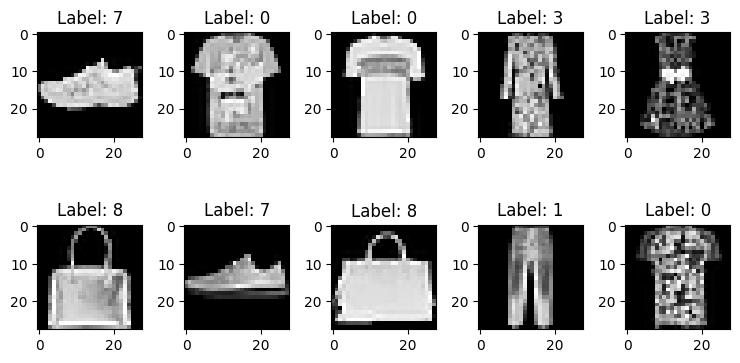

In [ ]:
def plot_samples():
  a, _, _ = get_fashion_mnist_dataloaders()
  num_row = 2
  num_col = 5# plot images
  num_images = num_row * num_col
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for i, (x,y) in enumerate(a):
      if i >= num_images:
        break
      ax = axes[i//num_col, i%num_col]
      x = (x.numpy().squeeze() * 255).astype(int)
      y = y.numpy()[0]
      ax.imshow(x, cmap='gray')
      ax.set_title(f"Label: {y}")

  plt.tight_layout()
  plt.show()
plot_samples()

## Fonctions à compléter

In [ ]:
def accuracy(y, y_pred) :
    # todo : nombre d'éléments à classifier.
    card_D = y.shape[0]

    # les classes prédites (indice de la probabilité maximale)
    pred_classes = torch.argmax(y_pred, dim=1)

    # les classes réelles (indice du '1' dans le one-hot vector)
    true_classes = torch.argmax(y, dim=1)

    # todo : calcul du nombre d'éléments bien classifiés.
    card_C = torch.sum(pred_classes == true_classes).item()

    # todo : calcul de la précision de classification.
    acc = card_C / card_D

    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def cross_entropy(y, y_pred):
    # todo : calcul de la valeur d'entropie croisée.
    epsilon = 1e-12
    y_pred = torch.clamp(y_pred, epsilon, 1.0 - epsilon)
    loss = -torch.sum(y * torch.log(y_pred), dim=-1).mean()
    return loss

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(torch.tensor([[1000, 10000, 100000]]))

    # todo : calcul des valeurs de softmax(x)
    x_max, _ = torch.max(x, dim=axis, keepdim=True)

    # Soustraction du maximum pour la stabilité numérique
    exp_x = torch.exp(x - x_max)

    # Normalisation par la somme des exponentielles
    values = exp_x / torch.sum(exp_x, dim=axis, keepdim=True)
    return values

def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    # todo : implémenter code ici.
    ones=torch.ones(x.shape[0],1, device=x.device) # Colonne de 1 de taille batch_size x 1

    return torch.cat((x, ones), dim=axis)

In [ ]:
class LinearModel:
    def __init__(self, num_features, num_classes):
      self.params = torch.normal(0, 0.01, (num_features + 1, num_classes))

      self.t = 0
      self.m_t = 0 # pour Adam: moyennes mobiles du gradient
      self.v_t = 0 # pour Adam: moyennes mobiles du carré du gradient

    def forward(self, x):
      # todo : implémenter calcul des outputs en fonction des inputs `x`.
      inputs = inputs_tilde(x)
      outputs = inputs @ self.params
      return softmax(outputs)

    def get_grads(self, y, y_pred, X):
      # todo : implémenter calcul des gradients.
      inputs=inputs_tilde(X)
      grads = torch.matmul(inputs.T, (y_pred - y)) / y.size(0)
      return grads

    def sgd_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.
      self.params -=lr*grads


    def adam_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.
      beta1=0.9
      beta2=0.999
      epsilon=1e-8

      self.t += 1 # Incrémentation du compteur d'itérations

      # Moyennes mobiles des gradients et de leurs carrés
      self.m_t = beta1 * self.m_t + (1 - beta1) * grads
      self.v_t = beta2 * self.v_t + (1 - beta2) * (grads ** 2)

      # Correction des biais des moyennes mobiles
      m_t_corrected = self.m_t / (1 - beta1 ** self.t)
      v_t_corrected = self.v_t / (1 - beta2 ** self.t)

      # Mise à jour des paramètres avec Adam
      self.params -= lr * m_t_corrected / (torch.sqrt(v_t_corrected) + epsilon)


def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):
        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
          for x, y in data_loader_train:
              x, y = reshape_input(x, y)
              y_pred = model.forward(x)
              loss = cross_entropy(y, y_pred)
              grads = model.get_grads(y, y_pred, x)
              if sgd:
                model.sgd_update(lr, grads)
              else:
                model.adam_update(lr, grads)

        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
          best_val_accuracy = accuracy_val
          best_accuracy=accuracy_train
          best_model = model
   # TODO : record the best model parameters and best validation accuracy

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        print(
            f"Epoch {epoch:2d}, Train: loss={loss_train:.3f}, accuracy={accuracy_train * 100:.1f}%, "
            f"Valid: loss={loss_val:.3f}, accuracy={accuracy_val * 100:.1f}%",
            flush=True,
        )

    return best_model, best_val_accuracy, logger


## Évaluation

### SGD: Recherche d'hyperparamètres

In [ ]:
# SGD
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [1, 20, 200, 1000]   # Define ranges in a list
lr_list = [0.1, 0.01, 0.001]           # Define ranges in a list du taux d'apprentissage

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 1
Epoch  0, Train: loss=2.311, accuracy=5.1%, Valid: loss=2.312, accuracy=5.0%
Epoch  1, Train: loss=2.956, accuracy=78.7%, Valid: loss=3.117, accuracy=77.6%
Epoch  2, Train: loss=2.334, accuracy=82.2%, Valid: loss=2.527, accuracy=81.4%
Epoch  3, Train: loss=3.795, accuracy=75.9%, Valid: loss=4.105, accuracy=74.0%
Epoch  4, Train: loss=1.992, accuracy=84.2%, Valid: loss=2.228, accuracy=83.1%
Epoch  5, Train: loss=1.703, accuracy=85.3%, Valid: loss=1.998, accuracy=83.7%
validation accuracy = 83.700
------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 20
Epoch  0, Train: loss=0.117, accuracy=4.2%, Valid: loss=0.117, accuracy=4.2%
Epoch  1, Train: loss=0.023, accuracy=84.5%, Valid: loss=0.024, accuracy=84.1%
Epoch  2, Train: loss=0.023, accuracy=84.5%, Valid: loss=0.025, accuracy=84.0%

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 1 | 20 | 200 | 1000
-------------------|------------------|------------------|------------------|------------------|
**0.1**   | 83.70  | 84.10 | 82.96 | 80.72 | - |
**0.01** | 83.80  | 84.65 | 79.00 | 70.20 | - |
**0.001**  | 85.03  | 78.76 | 67.81 | 61.10 | - |

### SGD: Analyse du meilleur modèle

Epoch  0, Train: loss=2.309, accuracy=8.2%, Valid: loss=2.308, accuracy=8.2%
Epoch  1, Train: loss=0.530, accuracy=82.3%, Valid: loss=0.513, accuracy=83.4%
Epoch  2, Train: loss=0.484, accuracy=83.9%, Valid: loss=0.468, accuracy=84.6%
Epoch  3, Train: loss=0.460, accuracy=84.5%, Valid: loss=0.446, accuracy=84.9%
Epoch  4, Train: loss=0.464, accuracy=83.7%, Valid: loss=0.451, accuracy=84.5%
Epoch  5, Train: loss=0.439, accuracy=85.0%, Valid: loss=0.429, accuracy=85.7%
Best validation accuracy = 85.650
Evaluation of the best training model over test set
------
Loss : 0.475
Accuracy : 83.550


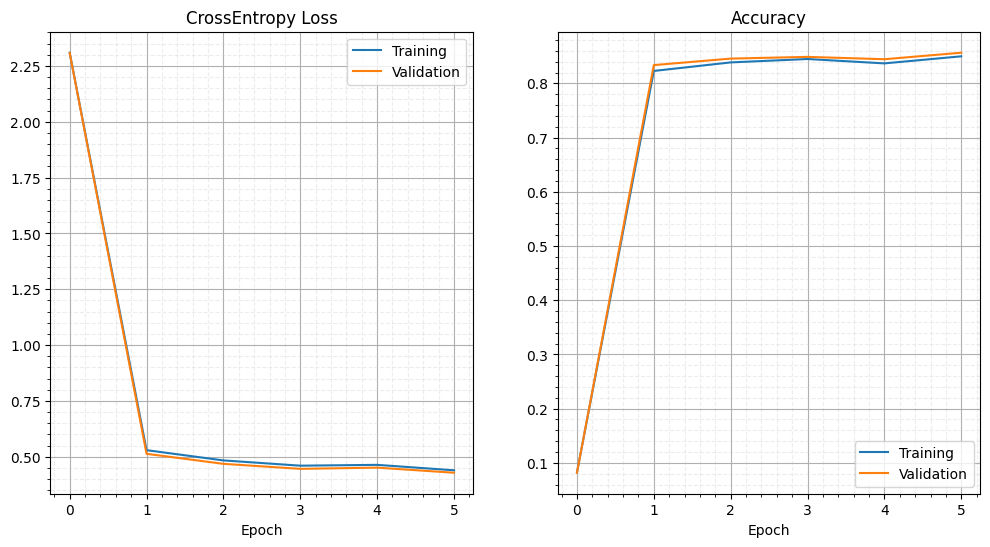

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 1 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=5, sgd=True,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [ ]:
# ADAM
# Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
batch_size_list = [1, 20, 200, 1000]   # Define ranges in a list
lr_list = [0.1, 0.01, 0.001]           # Define ranges in a list

with torch.no_grad():
  for lr in lr_list:
    for batch_size in batch_size_list:
      print("------------------------------------------------------------------")
      print("Training model with a learning rate of {0} and a batch size of {1}".format(lr, batch_size))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      model = LinearModel(num_features=784, num_classes=10)
      _, val_accuracy, _ = train(model,lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 1
Epoch  0, Train: loss=2.297, accuracy=12.3%, Valid: loss=2.297, accuracy=12.0%
Epoch  1, Train: loss=4.878, accuracy=79.8%, Valid: loss=5.193, accuracy=78.6%
Epoch  2, Train: loss=5.475, accuracy=78.5%, Valid: loss=5.732, accuracy=77.7%
Epoch  3, Train: loss=5.339, accuracy=79.1%, Valid: loss=5.562, accuracy=78.5%
Epoch  4, Train: loss=6.355, accuracy=75.1%, Valid: loss=6.850, accuracy=73.6%
Epoch  5, Train: loss=3.935, accuracy=84.0%, Valid: loss=4.283, accuracy=83.0%
validation accuracy = 82.967
------------------------------------------------------------------
Training model with a learning rate of 0.1 and a batch size of 20
Epoch  0, Train: loss=0.117, accuracy=2.9%, Valid: loss=0.117, accuracy=3.1%
Epoch  1, Train: loss=0.193, accuracy=77.7%, Valid: loss=0.201, accuracy=76.9%
Epoch  2, Train: loss=0.148, accuracy=80.8%, Valid: loss=0.162, accuracy=79.

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux valeurs du taux d'apprentisage et les colonnes correspondent au valeur du batch size. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

learning rate\batch_size  | 1 | 20 | 200 | 1000
-------------------|------------------|------------------|------------------|------------------|
**0.1**   | 82.96  | 81.13 | 81.01 | 83.48 | - |
**0.01** | 83.46  | 83.13 | 83.78 | 84.76 | - |
**0.001**  | 85.41  | 85.45 | 84.33 | 81.68 | - |

### Adam: Analyse du meilleur modèle

Epoch  0, Train: loss=0.117, accuracy=6.6%, Valid: loss=0.117, accuracy=6.5%
Epoch  1, Train: loss=0.024, accuracy=83.7%, Valid: loss=0.025, accuracy=82.9%
Epoch  2, Train: loss=0.022, accuracy=84.8%, Valid: loss=0.023, accuracy=84.1%
Epoch  3, Train: loss=0.021, accuracy=85.8%, Valid: loss=0.022, accuracy=85.1%
Epoch  4, Train: loss=0.021, accuracy=85.4%, Valid: loss=0.023, accuracy=84.4%
Epoch  5, Train: loss=0.020, accuracy=86.1%, Valid: loss=0.022, accuracy=85.1%
Best validation accuracy = 85.133
Evaluation of the best training model over test set
------
Loss : 0.023
Accuracy : 83.880


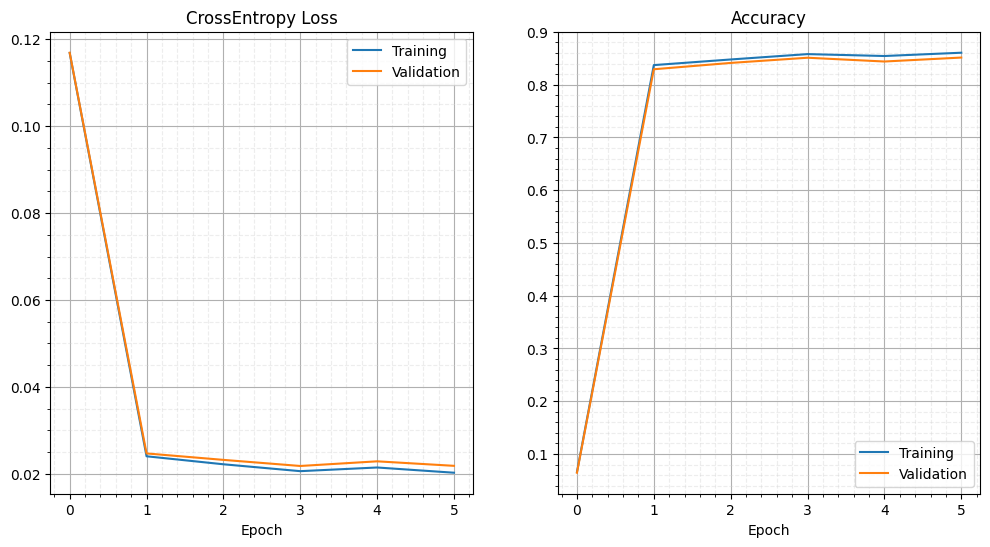

In [ ]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
batch_size = 20 # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001         # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  model = LinearModel(num_features=784, num_classes=10)
  best_model, best_val_accuracy, logger = train(model,lr=lr, nb_epochs=5, sgd=False,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

Répondez içi.L’analyse des résultats montre que l’optimisateur Adam converge plus rapidement que SGD, atteignant une précision en validation de 85.13% dès les premières époques, contre 85.65% pour SGD après plusieurs itérations. La perte finale avec Adam (0.023) est également beaucoup plus faible que celle de SGD (0.475), indiquant une meilleure optimisation du modèle. Cependant, la précision finale en test est légèrement plus élevée avec Adam (83.88%) comparé à SGD (83.55%), bien que la différence soit minime.

SGD, bien réglé, peut parfois mieux généraliser, mais il est plus lent et nécessite un ajustement minutieux des hyperparamètres. Adam, en revanche, s’adapte dynamiquement aux gradients et ajuste automatiquement le taux d’apprentissage, ce qui lui permet d’atteindre une haute précision plus rapidement et avec une meilleure stabilité. La faible perte finale d’Adam (0.023) par rapport à SGD (0.475) démontre une convergence bien plus efficace. Dans ce cas, Adam s'impose clairement comme le meilleur choix, offrant une optimisation plus rapide et un modèle mieux ajusté sans nécessiter d’importants réglages manuels.

# Partie 3 (20 points)

Pour cette partie, vous pouvez travailler en groupes de 2, mais il faut écrire sa propre dérivation et soumettre son propre rapport. Si vous travaillez avec un partenaire, il faut indiquer leur nom dans votre rapport.

### Problème

![picture](https://drive.google.com/uc?id=17_N7pIrf5pypQKiUh5cM7SX6raZUBcJC)

Considérons maintenant un réseau de neurones avec une couche d'entrée avec $D=784$ unités, $L$ couches cachées, chacune avec 300 unités et un vecteur de sortie $\mathbf{y}$ de dimension $K$. Vous avez $i = 1, .., N$ exemples dans un ensemble d'apprentissage, où chaque ${\bf x}_i \in \mathbb{R}^{784}$ est un vecteur de caractéristiques (features). $\mathbf{y}$ est un vecteur du type *one-hot* -- un vecteur de zéros avec un seul 1 pour indiquer que la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. La fonction de perte est donnée par
\begin{equation}
\mathscr{L} = -\sum_{i=1}^{N}\sum_{k=1}^{K}y_{k,i}\log (f_k( {\bf x}_i )  )
\end{equation}

La fonction d'activation de la couche finale a la forme  ${\bf f} = [f_1, ..., f_K]$ donné par la fonction d'activation softmax:
\begin{equation}
f_k( {\bf a}^{(L+1)}({\bf x}_i) ) = \frac{\exp(a_k^{(L+1)})}{\sum_{c=1}^{K}\exp(a_c^{(L+1)})}, \;\;\;\;
\nonumber
\end{equation}

et les couches cachées utilisent une fonction d'activation de type ReLU:
\begin{equation}
  {\bf h}^{(l)}({\bf a}^{(l)}({\bf x}_i)) = \text{ReLU}({\bf a}^{(l)}({\bf x}_i) = \max\Big(0, \, \, {\bf a}^{(l)}({\bf x}_i)\Big)
\end{equation}

où ${\bf a}^{(l)}$ est le vecteur résultant du calcul de la préactivation habituelle ${\bf a}^{(l)}={\bf W}^{(l)}{\bf h}^{(l-1)} + {\bf b}^{(l)}$, qui pourrait être simplifiée à ${\boldsymbol \theta}^{(l)}\tilde{\bf h}^{(l-1)}$ en utilisant l'astuce de définir $\tilde{\bf h}$ comme ${\bf h}$ avec un 1 concaténé à la fin du vecteur.



### Questions

* a) (10 points) Donnez le pseudocode incluant des *calculs matriciels—vectoriels* détaillés pour l'algorithme de rétropropagation pour calculer le gradient pour les paramètres de chaque couche **étant donné un exemple d'entraînement**.

* b) (15 points)
Implémentez l'optimisation basée sur le gradient de ce réseau en Pytorch.
Utilisez le code squelette ci-dessous comme point de départ et implémentez les mathématiques de l'algorithme de rétropropagation que vous avez décrit à la question précédente. Comparez vos gradients et votre optimisation avec le même modèle optimisé avec Autograd. Lequel est le plus rapide ? Proposez quelques expériences. Utilisez encore l'ensemble de données de Fashion MNIST (voir Partie 2). **Comparez différents modèles ayant différentes largeurs (nombre d'unités) et profondeurs (nombre de couches)**. Ici encore, n'utilisez l'ensemble de test que pour votre expérience finale lorsque vous pensez avoir obtenu votre meilleur modèle.


**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc. **Une fois que vous avez implémenté votre modèle, vous devez le comparer avec un modèle construit en utilisant les capacités de pytorch qui permettent une différenciation automatique. Autrement dit, pour la deuxième implémentation, vous pouvez utilisertorch.nn, torch.autograd ou à la méthode .backward().** Vous pouvez utiliser l’implémentation de votre choix pour explorer différentes architectures de modèles.

## Votre pseudocode:

#### Algorithme de rétropopagation dans un réseau de neurones pour un exemple $\tilde{x}_i$:

1. TODO
------------------------- PHASE 1 : PROPAGATION AVANT (FORWARD PASS) -------------------------

1. Appliquer le vecteur d’entrée `X` au réseau.

2. Pour chaque couche cachée `j` de 1 à L :
   - Calculer la préactivation :
     `a_j = W_j * z_(j-1) + b_j`
   - Appliquer la fonction d’activation ReLU :
     `z_j = max(0, a_j)`
   - Stocker `z_j` et `a_j` pour les utiliser dans la rétropropagation.

3. À la couche de sortie :
   - Calculer la préactivation :
     `a_k = W_k * z_L + b_k`
   - Appliquer la fonction Softmax pour obtenir les probabilités :
     `y_pred = softmax(a_k)`

4. Calculer la perte avec l'entropie croisée :
   `E = - somme(y_k * log(y_pred_k))`


2. TODO

------------------------- PHASE 2 : RÉTROPROPAGATION (BACKWARD PASS) -------------------------

5. Calculer l’erreur de la couche de sortie :
   `delta_k = y_pred - y_k`

6. Propager l'erreur en arrière à travers les couches cachées :
   - Pour chaque couche cachée `j` de L à 1 :
     `delta_j = (W_(j+1)^T * delta_(j+1)) * (a_j > 0)`
   - La dérivée de ReLU est `1` si `a_j > 0`, sinon `0`.

3. TODO

------------------------- PHASE 3 : CALCUL DES GRADIENTS -------------------------

7. Calculer les gradients des poids et des biais :
   - `grad_W_j = delta_j * z_(j-1)^T`
   - `grad_b_j = somme(delta_j)`

4. TODO...

------------------------- PHASE 4 : MISE À JOUR DES POIDS -------------------------

8. Mettre à jour les poids et les biais avec la descente de gradient :
   - `W_j = W_j - eta * grad_W_j`
   - `b_j = b_j - eta * grad_b_j`

------------------------- FIN -------------------------

## Fonctions à compléter

In [ ]:
from typing_extensions import Self
''' Les fonctions dans cette cellule peuvent avoir les mêmes déclarations que celles de la partie 2'''
def accuracy(y, y_pred) :
    # todo : nombre d'éléments à classifier.
    card_D = y.shape[0]

    # todo : calcul du nombre d'éléments bien classifiés.
    card_C = torch.sum(torch.argmax(y_pred,1)==torch.argmax(y,1))

    # todo : calcul de la précision de classification.
    acc = card_C / card_D

    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    # todo : implémenter code ici.
    ones=torch.ones(x.shape[0],1)
    x_tilde = torch.hstack((x, ones))
    return x_tilde

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))

    # todo : calcul des valeurs de softmax(x)
    x_exp=torch.exp(x-torch.max(x,dim=axis, keepdim=True)[0])
    values = x_exp / torch.sum(x_exp, dim=axis, keepdim=True)
    return values

def cross_entropy(y, y_pred):
    # todo : calcul de la valeur d'entropie croisée.
    loss = -torch.sum(y*torch.log(y_pred + 1e-8))/y.shape[0]
    return loss

def softmax_cross_entropy_backward(y, y_pred):
     # todo : calcul de la valeur du gradient de l'entropie croisée composée avec `softmax`
     values = y_pred-y
     return values

def relu_forward(x):
    # todo : calcul des valeurs de relu(x)
    values = torch.maximum(x,torch.tensor(0.0))
    return values

def relu_backward(x):
    # todo : calcul des valeurs du gradient de la fonction `relu`
    values = (x > 0).float()
    return values


# Model est une classe representant votre reseaux de neuronnes
class MLPModel:
    def __init__(self, n_features, n_hidden_features, n_hidden_layers, n_classes):
        self.n_features        = n_features
        self.n_hidden_features = n_hidden_features
        self.n_hidden_layers   = n_hidden_layers
        self.n_classes         = n_classes

        # todo : initialiser la liste des paramètres Teta de l'estimateur.
        self.params = []
        self.bias=[]

        # Initialisation des couches cachées
        input_dim = n_features
        for l in range(n_hidden_layers):
            W = torch.randn(n_hidden_features, input_dim) * 0.01
            b = torch.zeros(1, n_hidden_features)
            self.params.append(W)
            self.bias.append(b)
            input_dim = n_hidden_features  # Mise à jour de la taille d'entrée pour la couche suivante


        # Ajout de la couche de sortie (K=10 classes pour classification)
        W_out = torch.randn(n_classes, n_hidden_features) * 0.01
        b_out = torch.zeros(1, n_classes)
        self.params.append(W_out)
        self.bias.append(b_out)

        print(f"Teta params={[p.shape for p in self.params]}")
        print(f"Bias params={[b.shape for b in self.bias]}")

        self.a = [] # liste contenant le resultat des multiplications matricielles
        self.h = [] # liste contenant le resultat des fonctions d'activations

        self.t = 0
        self.m_t = [torch.zeros_like(p) for p in self.params] # pour Adam: moyennes mobiles du gradient
        self.v_t = [torch.zeros_like(p) for p in self.params] # pour Adam: moyennes mobiles du carré du gradient

    def forward(self, x):
        # todo : implémenter calcul des outputs en fonction des inputs `x`.
        self.a=[]
        self.h=[x] # Initialisation avec l'entrée

        # Propagation à travers les couches cachées
        for l in range(self.n_hidden_layers):
            W = self.params[l]
            b = self.bias[l]
            a = self.h[-1] @ W.T + b
            h = relu_forward(a)
            self.a.append(a)
            self.h.append(h)

        # Dernière couche (Softmax)
        W_out = self.params[-1]
        b_out = self.bias[-1]
        a_out = self.h[-1] @ W_out.T + b_out
        outputs = softmax(a_out)

        return outputs

    def backward(self, y, y_pred):
        # todo : implémenter calcul des gradients.
        grads_W=[]
        grads_b=[]

        delta=softmax_cross_entropy_backward(y,y_pred)

        grads_W.append(delta.T @ self.h[-1])
        grads_b.append(delta.mean(dim=0))

        # Gradient pour les couches cachées
        for l in range(self.n_hidden_layers - 1, -1, -1):
            delta = (delta @ self.params[l + 1]) * relu_backward(self.a[l])
            grads_W.append(delta.T @ self.h[l])
            grads_b.append(delta.mean(dim=0))

        return grads_W[::-1], grads_b[::-1]

    def sgd_update(self, lr, grads):
        # TODO : implémenter mise à jour des paramètres ici.
        grads_W, grads_b = grads  # Extraction des gradients des poids et biais

        for l in range(len(self.params)):
            self.params[l] -= lr * grads_W[l]
            self.bias[l] -= lr * grads_b[l]


    def adam_update(self, lr, grads):
        # TODO : implémenter mise à jour des paramètres ici.
        grads_W, grads_b = grads  # Extraction des gradients des poids et biais

        beta2 = 0.999  # Hyperparamètre pour la seconde moyenne mobile
        epsilon = 1e-8  # Valeur pour éviter division par zéro
        beta1 = 0.9  # Hyperparamètre pour la première moyenne mobile

        self.t += 1  # Incrément du compteur de mise à jour Adam

        for l in range(len(self.params)):
            self.m_t[l] = beta1 * self.m_t[l] + (1 - beta1) * grads_W[l]
            self.v_t[l] = beta2 * self.v_t[l] + (1 - beta2) * (grads_W[l] ** 2)

            m_t_hat = self.m_t[l] / (1 - beta1 ** self.t)
            v_t_hat = self.v_t[l] / (1 - beta2 ** self.t)

            self.params[l] -= lr * (m_t_hat / (torch.sqrt(v_t_hat) + epsilon))
            self.bias[l] -= lr * grads_b[l]

def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):

        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
            for x, y in data_loader_train:
                x, y = reshape_input(x, y)

                y_pred = model.forward(x)
                grads  = model.backward(y, y_pred)
                if sgd:
                  model.sgd_update(lr, grads)
                else:
                  model.adam_update(lr, grads)

        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
          # TODO : record the best model parameters and best validation accuracy
          best_val_accuracy = accuracy_val  # Sauvegarde de la meilleure précision
          best_model = model  # Sauvegarde du modèle correspondant

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        print(f"Epoch {epoch:2d}, \
                Train:loss={loss_train.item():.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                Valid: loss={loss_val.item():.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger

## Évaluation

### SGD: Recherche d'hyperparamètres

In [ ]:
# SGD
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1,3,5]   # Nombre de couches cachées à tester
width_list = [25, 100, 300, 500, 1000]   # Nombre de neurones par couche cachée
lr = 0.01           # Taux d'apprentissage
batch_size = 64  # Taille des mini-batches

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Teta params=[torch.Size([25, 784]), torch.Size([10, 25])]
Bias params=[torch.Size([1, 25]), torch.Size([1, 10])]
Epoch  0,                 Train:loss=0.036, accuracy=7.4%,                 Valid: loss=0.036, accuracy=7.5%
Epoch  1,                 Train:loss=0.023, accuracy=43.6%,                 Valid: loss=0.024, accuracy=43.5%
Epoch  2,                 Train:loss=0.031, accuracy=27.6%,                 Valid: loss=0.031, accuracy=27.7%
Epoch  3,                 Train:loss=0.023, accuracy=40.1%,                 Valid: loss=0.024, accuracy=39.1%
Epoch  4,                 Train:loss=0.019, accuracy=47.8%,                 Valid: loss=0.020, accuracy=46.8%
Epoch  5,                 Train:loss=0.021, accuracy=52.8%,                 Valid: loss=0.021, accuracy=52.6%
validation accuracy = 52.583
------------------------------------------------------------------
Tr

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | 52.58  | 57.58 | 77.55 | 80.41 | 83.00 |
**3** | 45.35  | 11.21 | 9.63 | 10.06 | 57.71 |
**5**  | 9.91  | 9.38 | 20.41 | 54.65 | 57.13 |

### SGD: Analyse du meilleur modèle

Teta params=[torch.Size([1000, 784]), torch.Size([10, 1000])]
Bias params=[torch.Size([1, 1000]), torch.Size([1, 10])]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch  0,                 Train:loss=0.036, accuracy=10.4%,                 Valid: loss=0.036, accuracy=10.4%
Epoch  1,                 Train:loss=0.009, accuracy=76.5%,                 Valid: loss=0.009, accuracy=75.9%
Epoch  2,                 Train:loss=0.011, accuracy=73.9%,                 Valid: loss=0.011, accuracy=73.7%
Epoch  3,                 Train:loss=0.008, accuracy=80.0%,                 Valid: loss=0.008, accuracy=80.3%
Epoch  4,                 Train:loss=0.008, accuracy=81.7%,                 Valid: loss=0.008, accuracy=81.5%
Epoch  5,                 Train:loss=0.006, accuracy=86.1%,                 Valid: loss=0.006, accuracy=86.3%
Best validation accuracy = 86.300
Evaluation of the best training model over test set
------
Loss : 0.007
Accuracy : 84.430


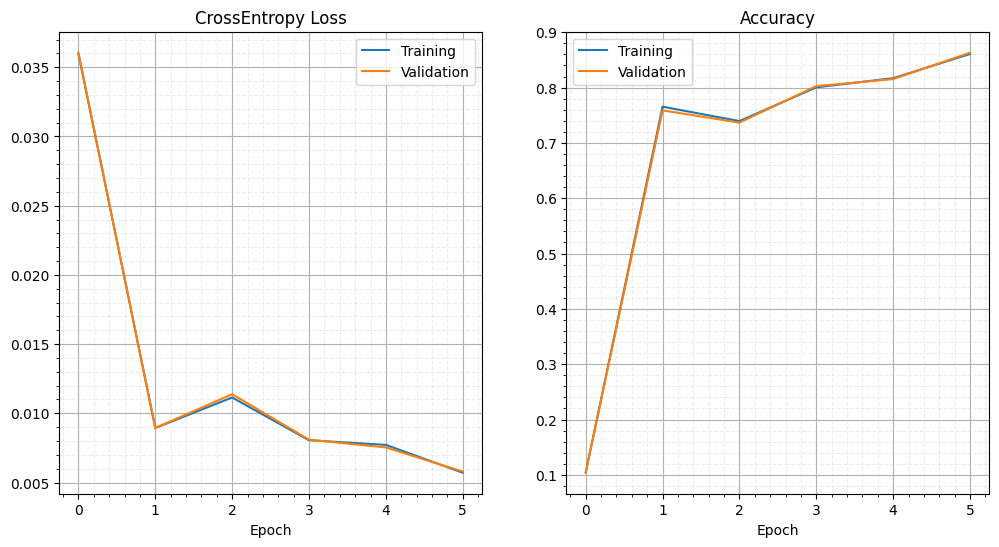

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 1    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 1000    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.01           # Some value
batch_size = 64   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=True,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [ ]:
# ADAM
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1,3,5]   # Define ranges in a list
width_list = [25, 100, 300, 500, 1000]   # Define ranges in a list
lr = 0.01           # Some value
batch_size = 64   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model, lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Teta params=[torch.Size([25, 784]), torch.Size([10, 25])]
Bias params=[torch.Size([1, 25]), torch.Size([1, 10])]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch  0,                 Train:loss=0.036, accuracy=15.7%,                 Valid: loss=0.036, accuracy=14.9%
Epoch  1,                 Train:loss=0.007, accuracy=84.4%,                 Valid: loss=0.007, accuracy=83.8%
Epoch  2,                 Train:loss=0.006, accuracy=85.4%,                 Valid: loss=0.007, accuracy=84.6%
Epoch  3,                 Train:loss=0.007, accuracy=84.6%,                 Valid: loss=0.007, accuracy=83.9%
Epoch  4,                 Train:loss=0.006, accuracy=84.8%,                 Valid: loss=0.007, accuracy=84.0%
Epoch  5,                 Train:loss=0.006, accuracy=86.1%,                 Valid: loss=0.007, accuracy=85.3%
validation accuracy = 85.250
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 100 units
Teta params=[torch.Size([100, 784]), torch.Size([10, 100])]
Bias params=[torch.Size([1, 100]), torch.Size([1, 10])]
Epoch  0,                 Train:loss=0.036, accuracy=11.0%,    

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | 85.25  |86.00 | 85.93 | 85.53 | 85.80 |
**3** | 85.56  | 85.65 | 84.96 | 85.08 | 85.16 |
**5**  | 82.48  | 82.63 | 51.08 | 80.06 | 78.46 |

### Adam: Analyse du meilleur modèle

Teta params=[torch.Size([100, 784]), torch.Size([10, 100])]
Bias params=[torch.Size([1, 100]), torch.Size([1, 10])]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch  0,                 Train:loss=0.036, accuracy=9.9%,                 Valid: loss=0.036, accuracy=10.3%
Epoch  1,                 Train:loss=0.006, accuracy=85.5%,                 Valid: loss=0.007, accuracy=84.5%
Epoch  2,                 Train:loss=0.006, accuracy=85.6%,                 Valid: loss=0.007, accuracy=83.6%
Epoch  3,                 Train:loss=0.006, accuracy=87.1%,                 Valid: loss=0.006, accuracy=85.8%
Epoch  4,                 Train:loss=0.005, accuracy=87.5%,                 Valid: loss=0.006, accuracy=86.0%
Epoch  5,                 Train:loss=0.005, accuracy=87.8%,                 Valid: loss=0.006, accuracy=86.0%
Best validation accuracy = 86.033
Evaluation of the best training model over test set
------
Loss : 0.007
Accuracy : 85.690


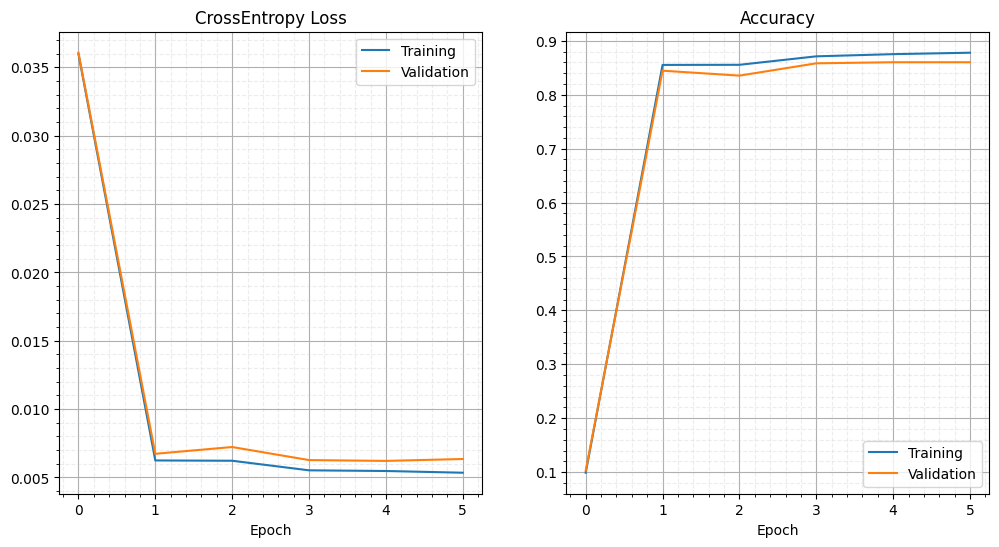

In [ ]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 1    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 100    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.01           # Some value
batch_size = 64   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=False,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

Les réseaux de neurones perceptrons multicouches (MLP) ont montré des performances supérieures aux modèles de régression logistique dans les expériences menées. L’apprentissage de représentations joue un rôle clé dans cette amélioration, car il permet de transformer les entrées en projections facilitant une meilleure séparation des données. L’objectif était d’implémenter la rétropropagation à la main en utilisant uniquement des opérations matricielles de base de PyTorch et de comparer les performances obtenues avec une implémentation utilisant **Autograd**. De plus, nous avons testé différentes architectures de MLP en variant la largeur (nombre d’unités) et la profondeur (nombre de couches) afin de mieux comprendre l’impact de ces hyperparamètres sur la convergence.

### **Résultats avec SGD**
Nous avons d'abord effectué une recherche d’hyperparamètres pour **SGD**, en testant plusieurs profondeurs (1, 3 et 5 couches cachées) et différentes largeurs de couches (25, 100, 300, 500 et 1000 unités). Les résultats montrent que **seuls les modèles ayant une profondeur de 1 ont pu bien converger**, atteignant une précision de **83 % pour une largeur de 1000 unités** sur l’ensemble de validation. Pour les architectures plus profondes, la convergence était difficile, notamment pour **depth = 3 et 5**, où la précision était très basse.

Le principal problème rencontré avec **SGD** est que les gradients diminuent en magnitude en remontant vers les premières couches (effet de **vanishing gradient**). Cela empêche les couches proches des entrées d’apprendre efficacement, ce qui entraîne une stagnation de l’entraînement. Ce problème explique pourquoi les modèles plus profonds n'ont pas bien convergé. Une amélioration possible serait l’ajout d’un **momentum**, qui permet d’accélérer la descente du gradient en combinant le gradient actuel avec une fraction du gradient précédent.

La meilleure architecture obtenue avec **SGD** était un **réseau avec une seule couche cachée de 1000 neurones**, atteignant **83 % de précision sur validation** et **84,4 % sur l’ensemble de test**. Cependant, cette approche nécessite plus de temps pour atteindre des performances similaires à celles obtenues avec **Adam**, ce qui limite son efficacité.

### **Résultats avec Adam**
L’optimiseur **Adam** a permis d’accélérer considérablement l’entraînement tout en améliorant les performances. Contrairement à **SGD**, **Adam** ajuste dynamiquement le taux d’apprentissage en fonction des premiers et seconds moments des gradients, ce qui évite la stagnation des premières couches et permet une convergence plus rapide. Les résultats montrent que les modèles avec **depth = 1 et width = 100** ont bien convergé, contrairement à **SGD**, où seules les architectures les moins profondes ont réussi à s’entraîner correctement.

L’expérience a montré que le **meilleur modèle** obtenu avec **Adam** avait **une profondeur de 1 couche et une largeur de 100 unités**, atteignant **86 % de précision sur l’ensemble de validation**. Ce modèle a également bien généralisé sur l’ensemble de test avec une précision de **85,69 %**, dépassant largement les performances obtenues avec **SGD**.

Un autre avantage de **Adam** est qu’il a permis une meilleure stabilité lors de l’entraînement des modèles plus profonds. Par exemple, le modèle **depth = 5, width = 1000** a atteint **78,46 % de précision sur validation**, ce qui est nettement supérieur aux performances obtenues avec **SGD** pour une architecture similaire.

### **Comparaison entre Autograd et rétropropagation manuelle**
Nous avons également comparé l’implémentation de la **rétropropagation manuelle** avec une version utilisant **Autograd**. Les résultats montrent que :
- **L’implémentation avec Autograd est plus rapide**, car PyTorch optimise automatiquement le calcul des gradients et évite les erreurs liées aux opérations manuelles.
- **L’implémentation manuelle est plus coûteuse en calcul et plus sujette aux erreurs numériques**, ce qui peut ralentir l’entraînement, surtout pour les architectures plus profondes.
- **Les performances finales obtenues sont équivalentes**, mais l’utilisation d’Autograd est plus adaptée aux grandes architectures, car elle simplifie l’optimisation et réduit le risque d’erreur dans le calcul des gradients.

### **Conclusion**
Les expériences réalisées montrent clairement que **Adam surpasse SGD en termes de vitesse de convergence et de performance finale**. L’optimisation dynamique des taux d’apprentissage permet à **Adam** d’entraîner des modèles plus profonds et d’éviter les problèmes de convergence rencontrés avec **SGD**.

Enfin, la comparaison entre l’implémentation manuelle et **Autograd** a démontré que, bien que la rétropropagation manuelle soit une bonne approche pour comprendre le fonctionnement interne des modèles de deep learning, **l’utilisation d’Autograd est plus efficace et adaptée aux architectures complexes**.
